<a href="https://colab.research.google.com/github/cristian0527/MATH-383/blob/main/Midterm_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm Project:
### Author: Cristian Castellmaos
### Professor DeFord

https://github.com/cristian0527/MATH-383/blob/main/Midterm_Project.ipynb

### Initiating Network Data: macaque-rhesus-brain-1

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import numpy.linalg as LA
import matplotlib as mpl
import matplotlib.cm as cm
import math
import requests
import json
from networkx.readwrite import json_graph
import pandas as pd
import csv
from sklearn.cluster import KMeans

In [8]:
brainN = nx.read_edgelist('bn-macaque-rhesus_brain_1.edges',
                      nodetype=int,
                      create_using=nx.Graph())

# sanity check
print(f"Nodes: {brainN.number_of_nodes()}")
print(f"Edges: {brainN.number_of_edges()}")
print(f"Is connected: {nx.is_connected(brainN)}")

Nodes: 242
Edges: 3054
Is connected: True


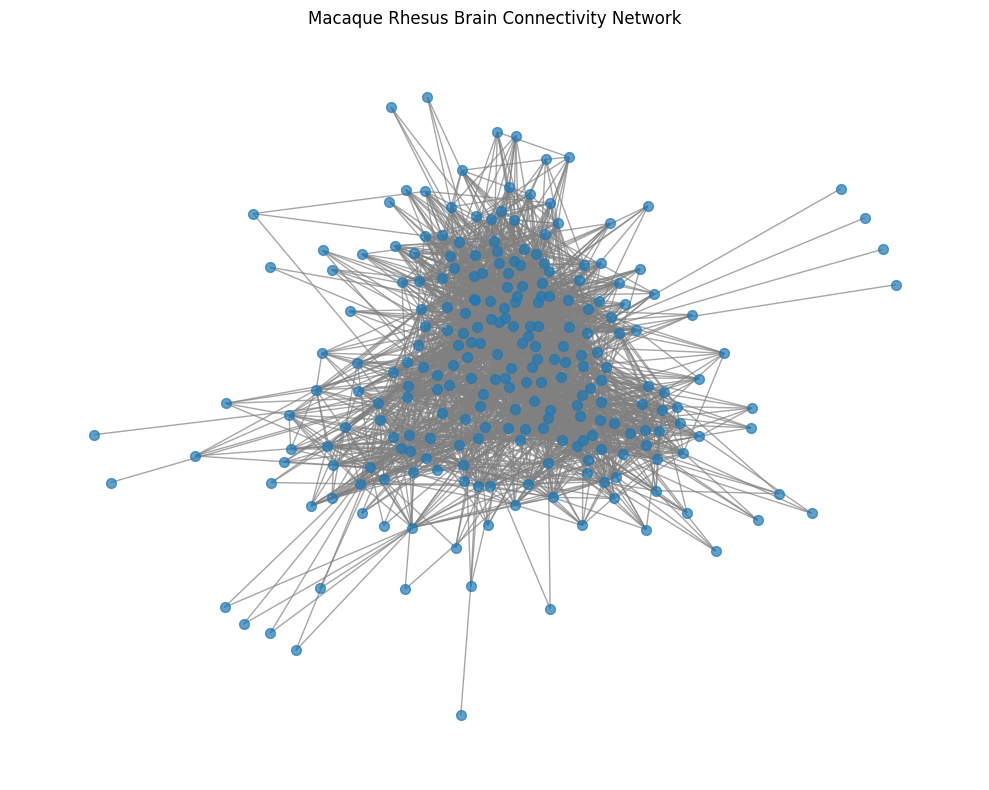

In [6]:
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(brainN, seed=67)
nx.draw_networkx(brainN, pos=pos,
                 node_size=50,
                 edge_color='gray',
                 alpha=0.7,
                 with_labels=False)
plt.title("Macaque Rhesus Brain Connectivity Network")
plt.axis('off')
plt.tight_layout()
plt.show()

In [18]:
# calibrating node
brainN = nx.convert_node_labels_to_integers(brainN, first_label=1)

print(f"Nodes: {(brainN.nodes())}")
print(f"Total nodes: {brainN.number_of_nodes()}")

Nodes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 

### Description of the Network Structure

The macaque rhesus brain connectivity network is a map of how different regions of a macaque monkey's brain are wired together. In the network, each node represents a specific region of the macaque monkey's brain. There are 242 of them in total. Each edge represents a fiber tract, which is a bundle of nerve fibers that directly connects two brain regions. If two regions have a fiber tract between them, there is an edge. If not, there is no edge. There are about 3,054 of these connections in the dataset. (Though on the website, it says 4.1K?).

The data was gathered through research studies of the macaque brain, where researchers identified and recorded which brain regions have these fiber tract connections to one another, ultimately compiling them into the edge list we're working with.

Another method that could have been used to define edges, for example, is instead of using fiber tracts, researchers could have connected two brain regions based on whether they tend to activate at the same time during tasks. Also, the choice of which brain regions to include as nodes could also vary depending on how precisely researchers choose to divide up the brain, with different division methods producing networks of different sizes and structures.

### Question Formulation: Figuring out the underlying social structure

1. Can we identify distinct groups of brain regions that are more connected to each other than to the rest of the brain?
2. Which brain regions act as critical "hubs," and do these hubs connect to many different groups of brain regions rather than just one?
3. How efficiently does information (or a simulated signal) spread across the brain network, and is the brain wired more efficiently than a random network would be?

### Exploratory Analysis

From the degree distribution visualization, most brain regions (nodes) have a decent number of connections, with most of the degree frequency being within 1 through 30. It's important to note that the distribution has a long right tail stretching all the way to a maximum degree of 111. There is also a large gap, though, from 80 degrees to 111 degrees. This means a small number of brain regions are acting as major hubs, connecting to nearly half the entire network, while many regions on the lower end, connecting to as few as 1 other region.

The average path length of just 2.22 means that on average, any two brain regions are only about 2 connections apart, and the diameter of 4 tells us that even the most distant pair of regions is never more than 4 steps away. Combined with a clustering coefficient of 0.45, this is a strong indicator of small world structure, signifying that the brain is organized so that nearby regions are densely interconnected while still maintaining very short pathways to everywhere else in the network.

The adjacency matrix further supports this because we are able to see noticeable dense blocks, particularly in the upper left corner, and everything is dispersed throughout the nodes. I'm predicting that there are groups of brain regions that are heavily connected, which I will touch on later when exploring community structure in the clustering analysis.

Average (mean) Degree: 25.24
Minimum Degree: 1
Maximum Degree: 111


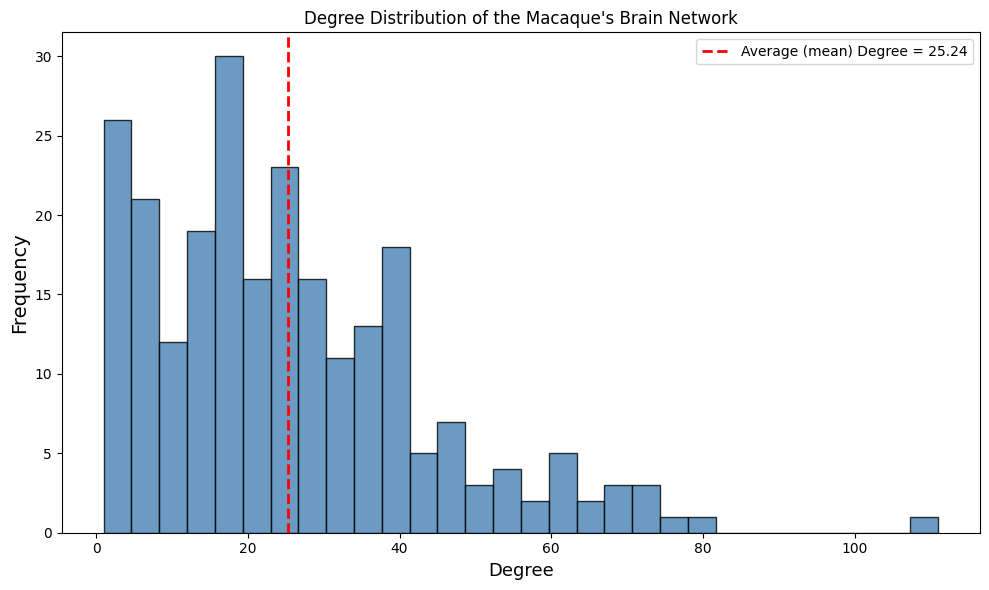

In [93]:
# Measuring statistics of the Macaque's brain network

degrees = [deg for node, deg in brainN.degree()]
avg_degree = np.mean(degrees)
min_degree = np.min(degrees)
max_degree = np.max(degrees)

print(f"Average (mean) Degree: {avg_degree:.2f}")
print(f"Minimum Degree: {min_degree}")
print(f"Maximum Degree: {max_degree}")


plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=30, color='steelblue', edgecolor='black', alpha=0.8)
plt.axvline(avg_degree, color='red', linestyle='dashed', linewidth=2, label=f'Average (mean) Degree = {avg_degree:.2f}')
plt.title("Degree Distribution of the Macaque's Brain Network")
plt.xlabel('Degree', fontsize=13)
plt.ylabel("Frequency", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

In [83]:
avg_path_length = nx.average_shortest_path_length(brainN)
clustering_coeff = nx.average_clustering(brainN)
density = nx.density(brainN)
diameter = nx.diameter(brainN)
radius = nx.radius(brainN)
transitivity = nx.transitivity(brainN)

print(f"Average Clustering Coefficient: {clustering_coeff:.4f}")
print(f"Average Path Length: {avg_path_length:.4f}")
print(f"Density: {density:.4f}")
print(f"Diameter (longest shortest path): {diameter}")
print(f"Radius: {radius}")
print(f"Transitivity: {transitivity:.4f}")

Average Clustering Coefficient: 0.4501
Average Path Length: 2.2175
Density: 0.1047
Diameter (longest shortest path): 4
Radius: 3
Transitivity: 0.3373


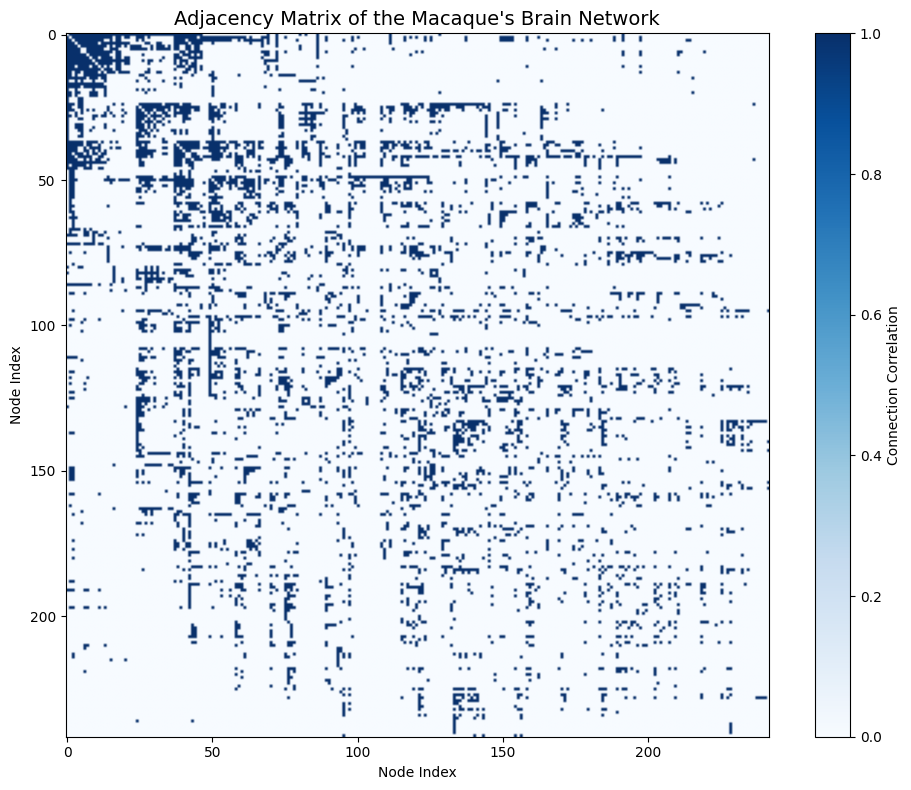

In [89]:
adj_matrix = nx.to_numpy_array(brainN)

plt.figure(figsize=(10, 8))
plt.imshow(adj_matrix, cmap='Blues')
plt.colorbar(label='Connection Correlation')
plt.title("Adjacency Matrix of the Macaque's Brain Network", fontsize=14)
plt.xlabel('Node Index')
plt.ylabel('Node Index')
plt.tight_layout()
plt.show()